In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
df = pd.read_csv("SMSSpamCollection", delimiter = '\t', names = ['label', 'message'])

In [4]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Text cleaning

In [5]:
import re, nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [6]:
lem = WordNetLemmatizer()
corpus = []
for i in range(len(df)):
    cleaned_df = re.sub('[^a-zA-Z]', " ", df['message'][i])

    cleaned_df = cleaned_df.lower()

    cleaned_df = word_tokenize(cleaned_df)

    cleaned_df = [lem.lemmatize(word) for word in cleaned_df if not word in set(stopwords.words('english'))]
    
    cleaned_df = ' '.join(cleaned_df)

    corpus.append(cleaned_df)

### TF-IDF

In [7]:
cv = TfidfVectorizer(max_features=5000)
x = cv.fit_transform(corpus).toarray()

### Creating x and y variables for train_test_split

In [8]:
x.shape

(5572, 5000)

In [9]:
y = pd.get_dummies(df['label'])
y = y.iloc[:, 1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

### Train test split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

### Naive Bayes Classifier

In [11]:
spam_detector = MultinomialNB().fit(x_train, y_train)
y_pred = spam_detector.predict(x_test)

### Confusion matrix

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[955,   0],
       [ 26, 134]])

<AxesSubplot:>

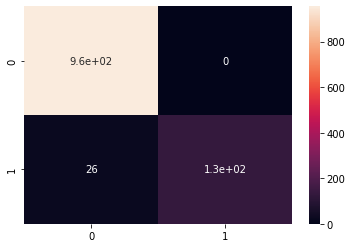

In [13]:
sns.heatmap(cm, annot = True)

### Accuracy of the model

In [14]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9766816143497757